In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/date-trips.csv", header=None)
df.columns = ["date", "rides_count"]

df["date"] = df["date"].str.replace('\t', '')
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek + 1
df["week_count"] = -1
df["rides_count"] = df["rides_count"].astype(int)

In [3]:
week_count = 0

for i in range(len(df)):
    if df.iloc[i]["day_of_week"] == 1:
        week_count += 1
    df.iloc[i, df.columns.get_loc('week_count')] = week_count

In [4]:
df = df[(df["date"] >= "2020-09-01") & (df["date"] <= "2020-11-01")]

In [5]:
df.sort_values("date").head(10)

,date,rides_count,day_of_week,week_count
184,2020-09-01,45306,2,27
185,2020-09-02,46266,3,27
186,2020-09-03,47681,4,27
187,2020-09-04,47145,5,27
188,2020-09-05,35261,6,27
189,2020-09-06,29148,7,27
190,2020-09-07,29407,1,28
191,2020-09-08,47028,2,28
192,2020-09-09,47116,3,28
193,2020-09-10,48057,4,28


In [6]:
df.sort_values("date").tail(10)

,date,rides_count,day_of_week,week_count
236,2020-10-23,44421,5,34
237,2020-10-24,33462,6,34
238,2020-10-25,27628,7,34
239,2020-10-26,43367,1,35
240,2020-10-27,42829,2,35
241,2020-10-28,44223,3,35
242,2020-10-29,45993,4,35
243,2020-10-30,47315,5,35
244,2020-10-31,35037,6,35
245,2020-11-01,30395,7,35


In [7]:
weeks_max = df.groupby("week_count").max("rides_count").reset_index()
weeks_min = df.groupby("week_count").min("rides_count").reset_index()

In [8]:
print("Maximum FHV Ridership:")

count =  []

for i in range(len(weeks_max)):
    day_of_week = int(df[(df["week_count"] == int(weeks_max.iloc[i]["week_count"])) &
                         (df["rides_count"] == int(weeks_max.iloc[i]["rides_count"]))]["day_of_week"])
    count.append(day_of_week)

pd.Series(count).value_counts()

Maximum FHV Ridership:


5    6
4    2
2    1
dtype: int64

In [9]:
print("Minimum FHV Ridership:")

count =  []

for i in range(len(weeks_min)):
    day_of_week = int(df[(df["week_count"] == int(weeks_min.iloc[i]["week_count"])) &
                         (df["rides_count"] == int(weeks_min.iloc[i]["rides_count"]))]["day_of_week"])
    count.append(day_of_week)

pd.Series(count).value_counts()

Minimum FHV Ridership:


7    9
dtype: int64

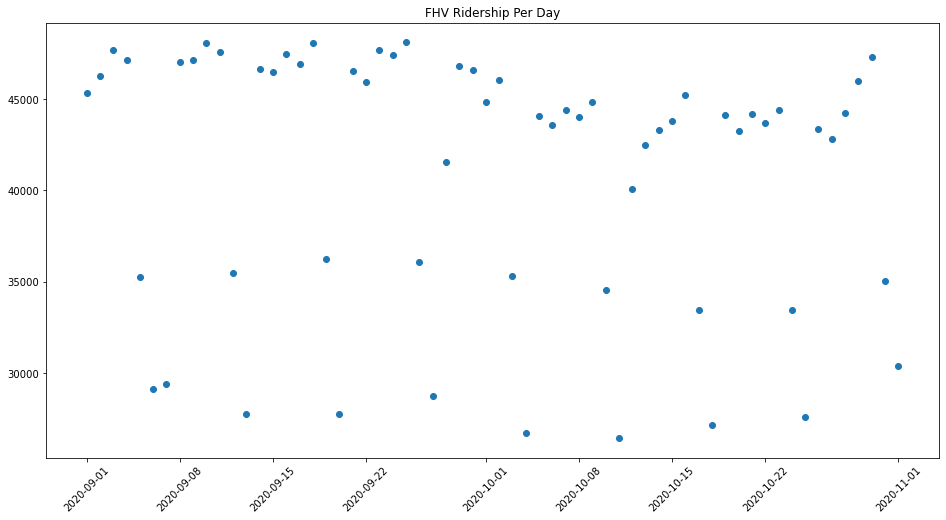

In [10]:
x = df["date"].to_list()
y = df["rides_count"].to_list()

fig, ax = plt.subplots()
plt.xticks(rotation=45)
plt.title("FHV Ridership Per Day")
fig.set_size_inches(16, 8)
ax.plot(x, y, 'o')
plt.show()